In [7]:
import xml.etree.ElementTree as ET

def extract_channel_positions(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Find the NP_PROBE node
    probe_node = root.find(".//NP_PROBE")

    # Get X and Y attributes from their respective nodes
    xpos_node = probe_node.find("ELECTRODE_XPOS")
    ypos_node = probe_node.find("ELECTRODE_YPOS")

    xpos = {int(k[2:]): int(v) for k, v in xpos_node.attrib.items() if k.startswith("CH")}
    ypos = {int(k[2:]): int(v) for k, v in ypos_node.attrib.items() if k.startswith("CH")}

    # Combine and sort by channel number
    ch_positions = [(ch, xpos.get(ch, None), ypos.get(ch, None)) for ch in sorted(set(xpos) | set(ypos))]

    return ch_positions

# Example usage
xml_path = r"D:\20250411\2025-04-11_14-53-28\Record Node 101\settings.xml"
positions = extract_channel_positions(xml_path)
for ch, x, y in positions:
    print(f"Ch {ch}: x={x}, y={y}")


Ch 0: x=11, y=0
Ch 1: x=114, y=3840
Ch 2: x=11, y=20
Ch 3: x=114, y=3860
Ch 4: x=11, y=40
Ch 5: x=114, y=3880
Ch 6: x=11, y=60
Ch 7: x=114, y=3900
Ch 8: x=11, y=80
Ch 9: x=114, y=3920
Ch 10: x=11, y=100
Ch 11: x=114, y=3940
Ch 12: x=11, y=120
Ch 13: x=114, y=3960
Ch 14: x=11, y=140
Ch 15: x=114, y=3980
Ch 16: x=11, y=160
Ch 17: x=114, y=4000
Ch 18: x=11, y=180
Ch 19: x=114, y=4020
Ch 20: x=11, y=200
Ch 21: x=114, y=4040
Ch 22: x=11, y=220
Ch 23: x=114, y=4060
Ch 24: x=11, y=240
Ch 25: x=114, y=4080
Ch 26: x=11, y=260
Ch 27: x=114, y=4100
Ch 28: x=11, y=280
Ch 29: x=114, y=4120
Ch 30: x=11, y=300
Ch 31: x=114, y=4140
Ch 32: x=11, y=320
Ch 33: x=114, y=4160
Ch 34: x=11, y=340
Ch 35: x=114, y=4180
Ch 36: x=11, y=360
Ch 37: x=114, y=4200
Ch 38: x=11, y=380
Ch 39: x=114, y=4220
Ch 40: x=11, y=400
Ch 41: x=114, y=4240
Ch 42: x=11, y=420
Ch 43: x=114, y=4260
Ch 44: x=11, y=440
Ch 45: x=114, y=4280
Ch 46: x=11, y=460
Ch 47: x=114, y=4300
Ch 48: x=11, y=480
Ch 49: x=114, y=4320
Ch 50: x=11, y=5

In [8]:
import numpy as np
x_pos = []
y_pos = []
for ch, x, y in positions:
    x_pos.append(x)
    y_pos.append(y)
    
file_path = r"D:\20250411\ProbeConfig.txt"

with open(file_path, 'w') as f:
    f.write("X-pos\n")
    for i, x in enumerate(x_pos):
        
        if i == 0:
            f.write(f"[{x}, ") 
        elif i == len(x_pos) - 1:
            f.write(f"{x}]") 
        else:
            f.write(f"{x}, ") 
            
    f.write("\n\n")

    f.write("Y-pos\n")
    for i, y in enumerate(y_pos):
        
        if i == 0:
            f.write(f"[{y}, ") 
        elif i == len(y_pos) - 1:
            f.write(f"{y}]") 
        else:
            f.write(f"{y}, ")
            
    f.write("\n\n")
print(f"Positions saved to '{file_path}'.")

Positions saved to 'D:\20250411\ProbeConfig.txt'.


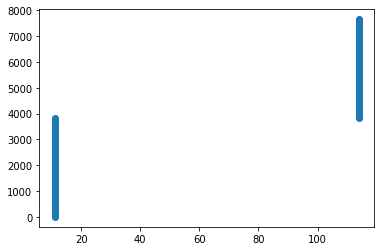

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x_pos, y_pos)